<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Li%C3%A7%C3%A3o/Churn_Modelo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#df = pd.read_csv('/kaggle/input/labdata-churn-challenge-2020/train.csv')
#df.head()

In [105]:
# 1
import numpy as np # linear algebra
import pandas as pd

url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_sample_submission = pd.read_csv(url_sample_submission)

#df = df_train.copy()
#df_teste = df_test.copy()

In [42]:
df_sample_submission.shape

(1409, 2)

In [106]:
# 2

df_Train = pd.read_csv(url_train)
df_Test = pd.read_csv(url_test)
df_Sample_Submission = pd.read_csv(url_sample_submission)


In [107]:
# 3

df_Test_Sample_Submission = df_Test.copy()
df_Test_Sample_Submission['Churn'] = df_Sample_Submission['Churn']
df_train = pd.concat([df_Train, df_Test_Sample_Submission],ignore_index=True)
df_churn = df_train.copy()

In [83]:
df_Train.shape

(5634, 21)

In [84]:
df_Train.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [78]:
df_Test.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [85]:
df_churn[5630:5650]

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0
5633,103,Male,0,No,No,38.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),95.00,3605.6,0
5634,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,0
5635,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
5636,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0
5637,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
5638,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0
5639,2093,Male,0,Yes,No,72.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),79.55,5810.9,0


In [86]:
indice_dependents_nan = df_churn[df_churn['Dependents'].isna()].index
indice_dependents_nan

Int64Index([  73,   89,  110,  156,  179,  222,  287,  293,  301,  324,
            ...
            6722, 6727, 6743, 6758, 6774, 6786, 6969, 6971, 7036, 7038],
           dtype='int64', length=259)

In [108]:
#4

def trata_Dependents_NaN(df):
  indice_dependents_nan = df[df['Dependents'].isna()].index
  for i in indice_dependents_nan:
      if df['Partner'][i]=='Yes':
          df['Dependents'][i] = 'Yes'
      else:
          df['Dependents'][i] = 'No'

In [92]:
df_churn['Dependents'][89]

nan

In [93]:
df_churn.iloc[73]

id                                  139
gender                             Male
SeniorCitizen                         0
Partner                              No
Dependents                          NaN
tenure                               57
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                    Yes
PaymentMethod              Mailed check
MonthlyCharges                     19.6
TotalCharges                    1170.55
Churn                                 0
Name: 73, dtype: object

In [109]:
# 5
trata_Dependents_NaN(df_churn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [99]:
df_train.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [111]:
# 6
def internet_service_reflexo(df):
  total_serv = []
  col_reflexo = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
  linha = 0
  while linha < df.shape[0]:
    qtde=0
    if df['InternetService'][linha]=='No':
      qtde = 0
    else:
      for i in col_reflexo:
        if df[i][linha] == 'Yes':
          qtde = qtde + 1
    total_serv.append(qtde)
    linha+=1
  df['total_serv']=total_serv

In [112]:
# 7
internet_service_reflexo(df_churn)

In [ ]:
df = df_train.copy()
#df_teste = df_test.copy()

In [ ]:
df.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_churn = df.copy()

In [ ]:
df_churn.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [113]:
df_churn.isna().sum()

id                    0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              579
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod       129
MonthlyCharges        0
TotalCharges          0
Churn                 0
total_serv            0
dtype: int64

In [ ]:
df_churn.shape

(5634, 21)

In [ ]:
df_churn['Churn'].value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [ ]:
#df_teste = pd.read_csv('/kaggle/input/labdata-churn-challenge-2020/test.csv')
#df_teste.isna().sum()

Tratamento dos NaN's: Mediana e Moda

In [ ]:
df_churn.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Outliers

In [7]:
def f_trata_outliers(df):
    for i in df.select_dtypes(include=['float64']).columns:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        df[i][df[i] < lim_inf] = lim_inf
        df[i][df[i] > lim_sup] = lim_sup
    return df

In [114]:
def trata_PaymentMethod_tenure(df):
    df['PaymentMethod'].fillna('Electronic check',inplace=True)
    #df_train['Dependents'].fillna('No',inplace=True)
    df['tenure'].fillna(df_train['tenure'].median(), inplace=True)

In [115]:
trata_PaymentMethod_tenure(df_churn)

In [117]:
df_churn[df_churn['TotalCharges'] == ' ']

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_serv
161,6755,Male,0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0,3
416,5219,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0
1766,6671,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0,4
2145,937,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0,5
3375,3827,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0
3404,1083,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,0
4008,3332,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0
5151,1341,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0,5
5947,4381,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,0
6697,489,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,1,4


In [118]:
df_churn[df_churn['TotalCharges'] == ' '].index

Int64Index([161, 416, 1766, 2145, 3375, 3404, 4008, 5151, 5947, 6697, 6931], dtype='int64')

In [124]:
df_churn['TotalCharges'][df_churn['TotalCharges'] != 0].median()

1397.475

In [125]:
df_churn['TotalCharges'].median()

1394.55

In [127]:
df_churn.describe()

,id,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,total_serv
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,32.082351,64.761692,2279.734304,0.308107,2.037910
std,2033.283305,0.368612,23.525800,30.090047,2266.794470,0.461744,1.847682
min,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,1761.500000,0.000000,10.000000,35.500000,398.550000,0.000000,0.000000
50%,3522.000000,0.000000,29.000000,70.350000,1394.550000,0.000000,2.000000
75%,5282.500000,0.000000,53.000000,89.850000,3786.600000,1.000000,3.000000
max,7043.000000,1.000000,72.000000,118.750000,8684.800000,1.000000,6.000000


In [130]:
def trata_TotalCharges(df):
    df['TotalCharges'][df['TotalCharges'] == ' '] = '0'
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
    df['TotalCharges'][df['TotalCharges'] == 0] = df['TotalCharges'].median()

In [131]:
trata_TotalCharges(df_churn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [132]:
df_churn[df_churn['TotalCharges'] == 0].index

Int64Index([], dtype='int64')

In [133]:
df_churn.shape

(7043, 22)

In [135]:
# Tratando variáveis categóricas:
def label_encoder(df):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    le = LabelEncoder()
    # 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    # 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    # 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    # 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','total_serv'

    df['gender_le'] = le.fit_transform(df['gender'])
    df['SeniorCitizen_le'] = le.fit_transform(df['SeniorCitizen'])
    df['Partner_le'] = le.fit_transform(df['Partner'])
    df['Dependents_le'] = le.fit_transform(df['Dependents'])
    df['PhoneService_le'] = le.fit_transform(df['PhoneService'])
    df['MultipleLines_le'] = le.fit_transform(df['MultipleLines'])
    df['InternetService_le'] = le.fit_transform(df['InternetService'])
    df['OnlineSecurity_le'] = le.fit_transform(df['OnlineSecurity'])
    df['OnlineBackup_le'] = le.fit_transform(df['OnlineBackup'])
    df['DeviceProtection_le'] = le.fit_transform(df['DeviceProtection'])
    df['TechSupport_le'] = le.fit_transform(df['TechSupport'])
    df['StreamingTV_le'] = le.fit_transform(df['StreamingTV'])
    df['StreamingMovies_le'] = le.fit_transform(df['StreamingMovies'])
    df['Contract_le'] = le.fit_transform(df['Contract'])
    df['PaperlessBilling_le'] = le.fit_transform(df['PaperlessBilling'])
    df['PaymentMethod_le'] = le.fit_transform(df['PaymentMethod'])
    df['total_serv_le'] = le.fit_transform(df['total_serv'])

In [8]:
def f_trata_col(df):
    df.columns = df.columns.str.lower()
    df['tenure'] = df['tenure'].fillna(df['tenure'].median())
    df['totalcharges'][df['totalcharges'] == ' '] = '0'
    df['totalcharges'] = pd.to_numeric(df['totalcharges'])
    df['totalcharges'][df['totalcharges'] == 0] = df['totalcharges'][df['totalcharges'] != 0].median()
    df = f_trata_outliers(df)
    ohe = pd.get_dummies(df)
    return ohe

In [136]:
label_encoder(df_churn)

In [167]:
def drop_col(df):
    col_selecionadas = ['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
    df.drop(columns = col_selecionadas,axis=1,inplace=True)

In [ ]:
drop_col(df_churn)

In [148]:
df_churn.columns

Index(['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'total_serv', 'gender_le',
       'SeniorCitizen_le', 'Partner_le', 'Dependents_le', 'PhoneService_le',
       'MultipleLines_le', 'InternetService_le', 'OnlineSecurity_le',
       'OnlineBackup_le', 'DeviceProtection_le', 'TechSupport_le',
       'StreamingTV_le', 'StreamingMovies_le', 'Contract_le',
       'PaperlessBilling_le', 'PaymentMethod_le', 'total_serv_le'],
      dtype='object')

In [158]:
df_churn.columns = df_churn.columns.str.lower()

In [159]:
df_churn.columns

Index(['tenure', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'total_serv', 'gender_le',
       'seniorcitizen_le', 'partner_le', 'dependents_le', 'phoneservice_le',
       'multiplelines_le', 'internetservice_le', 'onlinesecurity_le',
       'onlinebackup_le', 'deviceprotection_le', 'techsupport_le',
       'streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le', 'total_serv_le'],
      dtype='object')

MODELO: XGBoost

In [173]:
df_X = df_churn.drop(columns= 'churn', axis= 1)
df_y = df_churn['churn']

In [174]:
i_CV = 10 # Número de Cross-Validations
i_Seed = 22091980 # semente por questões de reproducibilidade
f_Test_Size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

In [175]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = f_Test_Size, random_state = i_Seed)

In [176]:
f'"X_treinamento.shape:" {X_treinamento.shape}, "y_treinamento_shape:"{y_treinamento.shape},"X_teste.shape:"{X_teste.shape},"y_teste.shape:"{y_teste.shape}'

'"X_treinamento.shape:" (4930, 21), "y_treinamento_shape:"(4930,),"X_teste.shape:"(2113, 21),"y_teste.shape:"(2113,)'

In [203]:
# função para GridSearchCV:
from sklearn.model_selection import GridSearchCV        # para GridSearchCV (otimizar os parâmetros dos modelos preditivos)
from time import time                                   # requerida na função gridsearchcv

def GridSearchOptimizer(modelo, ml_Opt, d_Parametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas):
    ml_GridSearchCV = GridSearchCV(modelo, d_Parametros, cv = i_CV, n_jobs = -1, verbose= 10, scoring = 'accuracy')
    start = time()
    ml_GridSearchCV.fit(X_treinamento, y_treinamento)
    tempo_elapsed = time()-start
    #print(f"\nGridSearchCV levou {tempo_elapsed:.2f} segundos.")

    # Parâmetros que otimizam a classificação:
    print(f'\nParametros otimizados: {ml_GridSearchCV.best_params_}')
    
    if ml_Opt == 'ml_DT2':
        print(f'\nDecisionTreeClassifier *********************************************************************************************************')
        ml_Opt = DecisionTreeClassifier(criterion= ml_GridSearchCV.best_params_['criterion'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_leaf_nodes= ml_GridSearchCV.best_params_['max_leaf_nodes'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_split'], 
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_RF2':
        print(f'\nRandomForestClassifier *********************************************************************************************************')
        ml_Opt = RandomForestClassifier(bootstrap= ml_GridSearchCV.best_params_['bootstrap'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_features= ml_GridSearchCV.best_params_['max_features'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_split'],
                                        n_estimators= ml_GridSearchCV.best_params_['n_estimators'],
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_AB2':
        print(f'\nAdaBoostClassifier *********************************************************************************************************')
        ml_Opt = AdaBoostClassifier(algorithm='SAMME.R', 
                                    base_estimator=RandomForestClassifier(bootstrap = False, 
                                                                          max_depth = 10, 
                                                                          max_features = 'auto', 
                                                                          min_samples_leaf = 1, 
                                                                          min_samples_split = 2, 
                                                                          n_estimators = 400), 
                                    learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                    n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                    random_state = i_Seed)
        
    elif ml_Opt == 'ml_GB2':
        print(f'\nGradientBoostingClassifier *********************************************************************************************************')
        ml_Opt = GradientBoostingClassifier(learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                            n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                            max_depth = ml_GridSearchCV.best_params_['max_depth'], 
                                            min_samples_split = ml_GridSearchCV.best_params_['min_samples_split'], 
                                            min_samples_leaf = ml_GridSearchCV.best_params_['min_samples_leaf'], 
                                            max_features = ml_GridSearchCV.best_params_['max_features'])
        
    elif ml_Opt == 'ml_XGB2':
        print(f'\nXGBoostingClassifier *********************************************************************************************************')
        ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
                                      max_depth= ml_GridSearchCV.best_params_['max_depth'], 
                                      colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'], 
                                      subsample= ml_GridSearchCV.best_params_['subsample'], 
                                      gamma= ml_GridSearchCV.best_params_['gamma'], 
                                      min_child_weight= ml_GridSearchCV.best_params_['min_child_weight'])
        
    # Treina novamente usando os parametros otimizados...
    ml_Opt.fit(X_treinamento, y_treinamento)

    # Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)

    # Faz predições com os parametros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_


In [195]:
# Função para Confusion Matrix:
import matplotlib.pyplot as plt
import seaborn as sns

def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

In [177]:
from xgboost import XGBClassifier
import xgboost as xgb

# Instancia...
ml_XGB= XGBClassifier(silent=False, 
                         scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 1,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth= 3, 
                        gamma=1, 
                        max_delta_step=5)

# Treina... 
ml_XGB.fit(X_treinamento, y_treinamento)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [178]:
from sklearn.model_selection import cross_val_score

In [179]:
def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    #versão com cross_val_score::
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV

In [180]:
a_scores_CV = funcao_cross_val_score(ml_XGB, X_treinamento, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 74.08
std médio das Acurácias calculadas pelo CV: 2.09


In [181]:
a_scores_CV

array([0.75456389, 0.73630832, 0.7484787 , 0.75862069, 0.68965517,
       0.76673428, 0.75456389, 0.74036511, 0.73427992, 0.72413793])

In [182]:
#ml_XGB.fit(X_treinamento, y_treinamento)
y_pred = ml_XGB.predict(X_teste)

unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1705  408]]


In [183]:
y_pred = ml_XGB.predict(df_churn[5634:].drop('churn',axis=1))

unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1134  275]]



********* CONFUSION MATRIX - PARAMETER TUNNING ***********


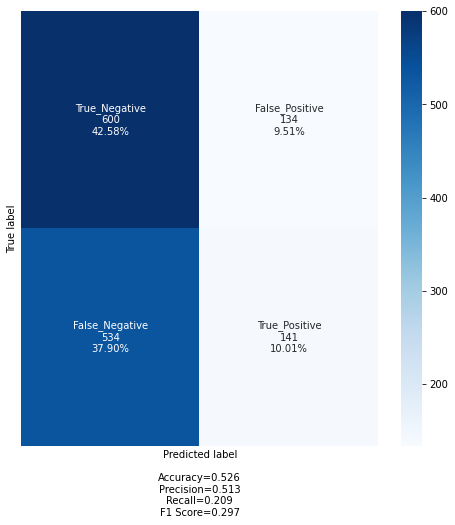

In [196]:
from sklearn.metrics import confusion_matrix
print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
cf_matrix = confusion_matrix(df_churn['churn'][5634:], y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)


In [ ]:
#df_teste_submit = f_trata_col(df_teste)
df_teste_submit = df_teste.copy()
df_teste_submit.head()

,id,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,5027,0,23.0,20.00,445.30,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,1733,1,61.0,99.00,5969.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
2,5384,0,36.0,84.75,3050.15,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,6554,0,61.0,61.45,3751.15,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
4,364,0,47.0,20.55,945.70,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
y_teste_submit = ml_XGB.predict(df_teste_submit)

In [ ]:
df_submit = pd.DataFrame(zip(df_teste_submit['id'],y_teste_submit), columns = ['id','Churn'])

In [ ]:
df_submit.head()

,id,Churn
0,5027,0
1,1733,0
2,5384,1
3,6554,0
4,364,0


In [ ]:
df_submit.to_csv('submit12.csv',index = False, sep = ',')

In [ ]:
df_submit.Churn.value_counts()

0    1105
1     304
Name: Churn, dtype: int64

In [ ]:
df_sample_submission['Churn'].value_counts()

0    734
1    675
Name: Churn, dtype: int64

In [ ]:
734/1105

0.6642533936651583

In [199]:
from sklearn.feature_selection import SelectFromModel

def seleciona_colunas_relevantes(modelo, X_treinamento, X_teste, threshold = 0.05):
    # Cria um seletor para selecionar as COLUNAS com importância > threshold
    sfm = SelectFromModel(modelo, threshold)
    
    # Treina o seletor
    sfm.fit(X_treinamento, y_treinamento)

    # Mostra o indice das COLUNAS mais importantes
    print(f'\n********** COLUNAS Relevantes ******')
    print(sfm.get_support(indices=True))

    # Seleciona somente as COLUNAS relevantes
    X_treinamento_I = sfm.transform(X_treinamento)
    X_teste_I = sfm.transform(X_teste)
    return X_treinamento_I, X_teste_I   

In [200]:
# NÃO
# Dicionário de Hiperparâmetros para XGBoost:
d_hiperparametros_XGB = {'min_child_weight': [7], #i for i in np.arange(1, 13)]} #,
                         'gamma': [i for i in np.arange(0, 5, 0.5)],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'max_depth': [3, 4, 5, 7, 9],
                         'learning_rate': [i for i in np.arange(0.01, 1, 0.1)]}

In [204]:
# Dicionário de Hiperparâmetros para XGBoost:
d_hiperparametros_XGB = {'min_child_weight': [1,7],
                         'gamma': [i for i in np.arange(0, 1, 0.5)],
                         'subsample': [0.6, 0.8, 1.0],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'max_depth': [3, 4],
                         'learning_rate': [i for i in np.arange(0.1, 1, 0.1)]}

In [205]:
# Invoca a função
l_colunas = X_treinamento.columns
ml_XGB, best_params= GridSearchOptimizer(ml_XGB, 'ml_XGB2', d_hiperparametros_XGB, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5


Parametros otimizados: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 1.0}

XGBoostingClassifier *********************************************************************************************************


NameError: ignored

In [212]:
from xgboost import XGBClassifier
import xgboost as xgb

ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate':{0.1}],
                              max_depth= ml_GridSearchCV.best_params_['max_depth':{3.}],
                              colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree':{1.0}],
                              subsample= ml_GridSearchCV.best_params_['subsample':{1.0}], 
                              gamma= ml_GridSearchCV.best_params_['gamma': {0.5}], 
                              min_child_weight= ml_GridSearchCV.best_params_['min_child_weight':{7}])
        
# Treina novamente usando os parametros otimizados...
ml_Opt.fit(X_treinamento, y_treinamento)

  
  


NameError: ignored

In [213]:
best_params= {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 1.0}


ml_XGB2= XGBClassifier(min_child_weight= best_params['min_child_weight'], 
                       gamma= best_params['gamma'], 
                       subsample= best_params['subsample'], 
                       colsample_bytree= best_params['colsample_bytree'], 
                       max_depth= best_params['max_depth'], 
                       learning_rate= best_params['learning_rate'], 
                       random_state= i_Seed)

In [214]:
X_treinamento_XGB, X_teste_XGB= seleciona_colunas_relevantes(ml_XGB2, X_treinamento, X_teste)


********** COLUNAS Relevantes ******
[10 11 14 17]


In [218]:
X_treinamento_XGB.shape

(4930, 4)

In [219]:
ml_XGB2.fit(X_treinamento_XGB, y_treinamento)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=22091980,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [ ]:
# Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)


In [ ]:
# Faz predições com os parametros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_

In [ ]:
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 319.6min finished

Parametros otimizados: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 1.0}

XGBoostingClassifier *********************************************************************************************************
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-205-808d9b5c1b81> in <module>()
      1 # Invoca a função
      2 l_colunas = X_treinamento.columns
----> 3 ml_XGB, best_params= GridSearchOptimizer(ml_XGB, 'ml_XGB2', d_hiperparametros_XGB, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)

<ipython-input-203-a0b815693450> in GridSearchOptimizer(modelo, ml_Opt, d_Parametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)
     56     elif ml_Opt == 'ml_XGB2':
     57         print(f'\nXGBoostingClassifier *********************************************************************************************************')
---> 58         ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
     59                                       max_depth= ml_GridSearchCV.best_params_['max_depth'],
     60                                       colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'],

NameError: name 'XGBoostingClassifier' is not defined

In [ ]:
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 319.6min finished

Parametros otimizados: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 1.0}

In [ ]:
# Como o procedimento acima levou 372 minutos para executar, então vou estimar ml_XGB2 abaixo usando os parâmetros acima estimados
best_params= {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.51, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}

ml_XGB2= XGBClassifier(min_child_weight= best_params['min_child_weight'], 
                       gamma= best_params['gamma'], 
                       subsample= best_params['subsample'], 
                       colsample_bytree= best_params['colsample_bytree'], 
                       max_depth= best_params['max_depth'], 
                       learning_rate= best_params['learning_rate'], 
                       random_state= i_Seed)

In [ ]:
X_treinamento_XGB, X_teste_XGB= seleciona_colunas_relevantes(ml_XGB2, X_treinamento, X_teste)


********** COLUNAS Relevantes ******
[ 6  7 11 13]


In [ ]:
ml_XGB2# Treina com as COLUNAS relevantes...
ml_XGB2.fit(X_treinamento_XGB, y_treinamento)

# Cross-Validation com 10 folds
a_scores_CV = fu

In [221]:
y_pred = ml_XGB2.predict(X_teste_XGB)

unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1650  463]]


In [224]:
X_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 6635 to 6729
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tenure               2113 non-null   float64
 1   monthlycharges       2113 non-null   float64
 2   totalcharges         2113 non-null   float64
 3   total_serv           2113 non-null   int64  
 4   gender_le            2113 non-null   int64  
 5   seniorcitizen_le     2113 non-null   int64  
 6   partner_le           2113 non-null   int64  
 7   dependents_le        2113 non-null   int64  
 8   phoneservice_le      2113 non-null   int64  
 9   multiplelines_le     2113 non-null   int64  
 10  internetservice_le   2113 non-null   int64  
 11  onlinesecurity_le    2113 non-null   int64  
 12  onlinebackup_le      2113 non-null   int64  
 13  deviceprotection_le  2113 non-null   int64  
 14  techsupport_le       2113 non-null   int64  
 15  streamingtv_le       2113 non-null 

In [ ]:
X_test_XGB = 